In [157]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [158]:
path = "C:/Users/hjhhi/Desktop/Data/Oil_calssification/"
train = pd.read_csv(os.path.join(path, "train.csv"))
test = pd.read_csv(os.path.join(path, "test.csv"))
sample_submission = pd.read_csv(os.path.join(path, "sample_submission.csv"))

In [159]:
train.head(5)

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [160]:
test.head(5)

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469


In [161]:
categorical_features = ['COMPONENT_ARBITRARY', 'YEAR']
# Inference(실제 진단 환경)에 사용하는 컬럼
test_stage_features = ['COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR' , 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']

# Category encoding

In [162]:
from sklearn.preprocessing import OneHotEncoder

In [163]:
def last_num(x):
    return int(x[-1])

In [164]:
train["COMPONENT_ARBITRARY"] = train["COMPONENT_ARBITRARY"].apply(last_num)
test["COMPONENT_ARBITRARY"] = test["COMPONENT_ARBITRARY"].apply(last_num)

In [165]:
# encoder = OneHotEncoder()
# train["COMPONENT_ARBITRARY"] = encoder.fit_transform(np.array(train["COMPONENT_ARBITRARY"]).reshape(1, -1)).toarray()[0]
# test["COMPONENT_ARBITRARY"] = encoder.transform(np.array(test["COMPONENT_ARBITRARY"]).reshape(1, -1))

In [166]:
#  train.info()

# Missing value(need to add scaling for linear model)

In [167]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

C:\Users\hjhhi\AppData\Local\Temp\ipykernel_19416\1144841304.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train = train.fillna(train.mean())
C:\Users\hjhhi\AppData\Local\Temp\ipykernel_19416\1144841304.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test = test.fillna(test.mean())


In [168]:
from sklearn.model_selection import train_test_split

# Split 

In [169]:
X = train.drop(['ID', 'Y_LABEL'], axis = 1)
y = train['Y_LABEL']

test = test.drop(['ID'], axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

In [170]:
for _ in range(3):
    X_train = X_train.append(X_train[y_train==1])
    y_train = y_train.append(y_train[y_train==1])

C:\Users\hjhhi\AppData\Local\Temp\ipykernel_19416\585892982.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(X_train[y_train==1])
C:\Users\hjhhi\AppData\Local\Temp\ipykernel_19416\585892982.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(y_train[y_train==1])
C:\Users\hjhhi\AppData\Local\Temp\ipykernel_19416\585892982.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(X_train[y_train==1])
C:\Users\hjhhi\AppData\Local\Temp\ipykernel_19416\585892982.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(y_train[y_train==1])
C:\Users\h

# Teacher model 

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [197]:
from sklearn.model_selection import GridSearchCV

In [200]:
param_grid={'max_depth':[3,4,5],
        'learning_rate':[1, 0.5, 0.1, 0.01, 0.05],
        'gamma':[0, 0.25, 1.0],
        'reg_lambda': [0, 1.0, 10.0, 20, 100],
        'scale_pos_weight': [1, 3, 5]
       }
       
optimal_params = GridSearchCV(
      estimator=XGBClassifier(objective='binary:logistic',
    subsample=0.9,colsample_bytree=0.5),
      param_grid=param_grid,
      scoring='f1',
      verbose=0, #뭐하는지 알고 싶으면 2로 설정해볼 것
      n_jobs=10,
      cv=3
   )

In [202]:
optimal_params.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5],
                         'reg_lambda': [0, 1.0, 10.0, 20, 100],
                         'scale_pos_weight': [1, 3, 5]},
             scoring='f1')

In [203]:
optimal_params.best_params_

{'gamma': 1.0,
 'learning_rate': 0.5,
 'max_depth': 5,
 'reg_lambda': 0,
 'scale_pos_weight': 1}

In [204]:
teacher = XGBClassifier(gamma=1, learniing_rage = 0.5, max_depth = 5, reg_lambda = 0, scale_pos_weight=1)
teacher.fit(X_train, y_train)

[19:10:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "learniing_rage" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learniing_rage=0.5,
              learning_rate=0.300000012, max_bin=256, max_cat_threshold=64,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto', ...)

<BarContainer object of 52 artists>

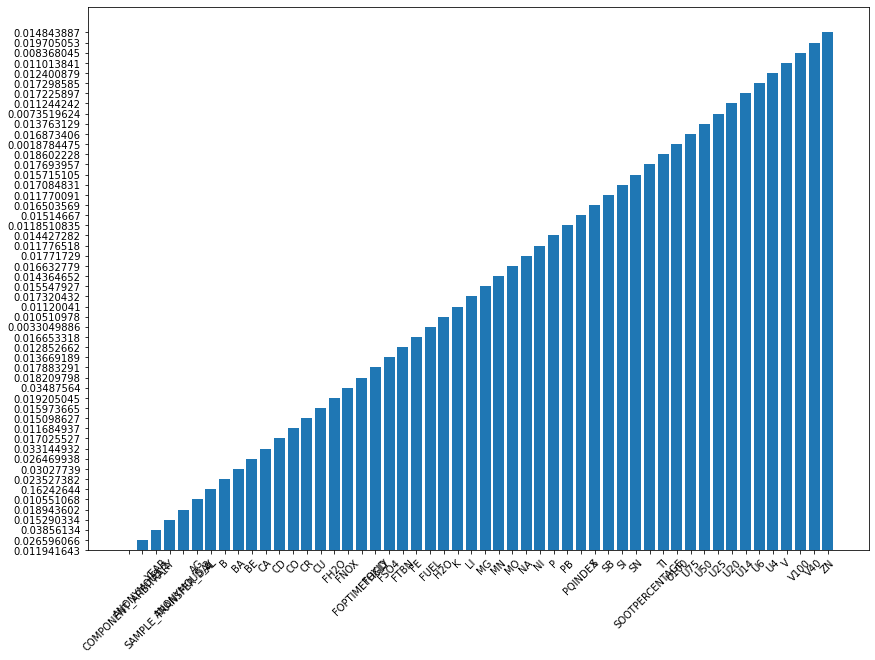

In [205]:
temp = []
for i in range(len(teacher.feature_importances_)):
    temp.append([X_train.columns[i], teacher.feature_importances_[i]])
temp = np.array(temp)
plt.figure(figsize=(14, 10))
plt.xticks(rotation=45)
plt.bar(temp[:,0], temp[:,1])

KD의 student모델은 앞부분의 컬럼을 메인으로 학습하지만 특성중요도는 대다수 선형적으로 증가하는 경향을 보인다.  
student모델의 튜닝보다는 teacher모델의 튜닝이 성능에 큰 영향을 줄 것이다.

# Eval teacher (low then base code[0.79])

In [206]:
from sklearn.metrics import f1_score

In [214]:
pred = teacher.predict(X_val)
f1_score(y_val, pred, average=None)

array([0.94635488, 0.50273224])

# Student

In [215]:
from xgboost import XGBRegressor

In [216]:
teacher_pred = teacher.predict_proba(X_train)

In [217]:
student = XGBRegressor()
student.fit(X_train[test_stage_features],teacher_pred[:,1])

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [218]:
student_pred = student.predict(X_val[test_stage_features])
student_pred = pd.Series([i for i in student_pred>0.5])
student_pred[student_pred==False]=0
student_pred[student_pred==True]=1
student_pred = student_pred.astype(int)
f1_score(student_pred, y_val, average=None)

array([0.92376334, 0.1863354 ])

In [219]:
print(classification_report(student_pred, y_val))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2577
           1       0.19      0.19      0.19       242

    accuracy                           0.86      2819
   macro avg       0.56      0.55      0.56      2819
weighted avg       0.86      0.86      0.86      2819



<BarContainer object of 18 artists>

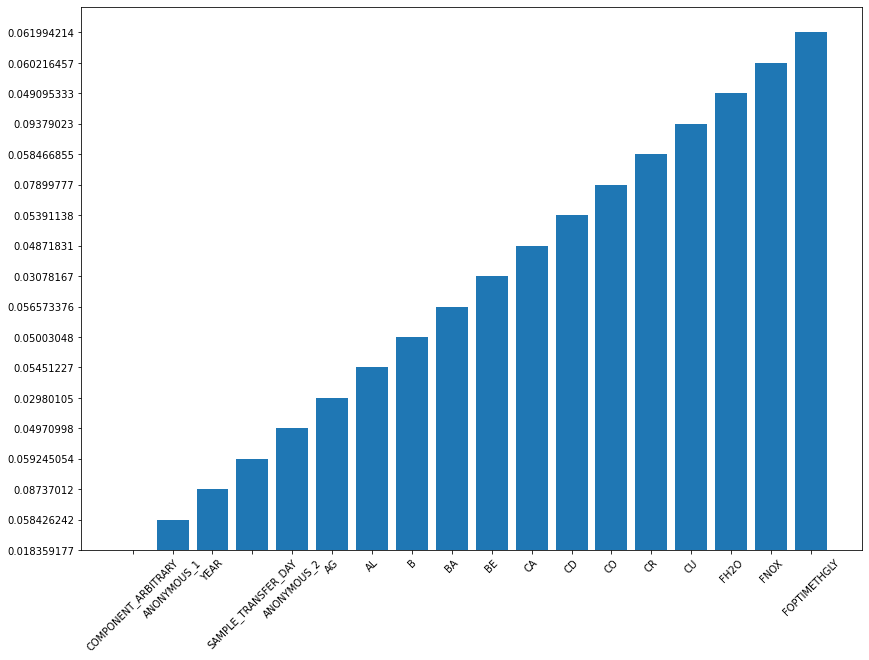

In [220]:
temp = []
for i in range(len(student.feature_importances_)):
    temp.append([X_val.columns[i], student.feature_importances_[i]])
temp = np.array(temp)
plt.figure(figsize=(14, 10))
plt.xticks(rotation=45)
plt.bar(temp[:,0], temp[:,1])

In [222]:
submission = student.predict(test)
submission = pd.Series([i for i in submission>0.5])
submission[submission==False]=0
submission[submission==True]=1
submission = submission.astype(int)

In [223]:
sample_submission["Y_LABEL"] = submission

In [224]:
sample_submission.to_csv('./submit.csv', index=False)